# Logistic Regression
# $ln(\frac{p}{1-p}) = \beta_0 + \beta_1x$
# $p = \frac{e^{\beta_0 + \beta_1x}}{1+e^{\beta_0 + \beta_1x}}$

# $\text{Likelihood} = \prod_{i=1}^{N} p_{i}^{y_i}(1-p_{i})^{1-y_i} $
# $LL = log(\text{Likelihood}) = \sum_{i=1}^{N} y_ilog(p_i) + (1-y_i)log(1-p_i)$

# $\frac{\partial LL}{\partial \beta_0} = \sum_{i=1}^{N} (y_i - p_i) $
# $\frac{\partial LL}{\partial \beta_1} = \sum_{i=1}^{N} (y_i - p_i) x_i $

# Goal: Maximize Log Likelihood

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
class_1 = np.random.random(20)*2 + 1
class_2 = np.random.random(20)*2 - 0.5

In [3]:
data = pd.DataFrame()
data['x'] = np.concatenate([class_1, class_2])
data['y'] = [0]*20 + [1]*20
data = data.sample(frac=1)

In [4]:
data.head()

,x,y
38,-0.445893,1
22,0.787849,1
6,1.467442,0
4,2.478344,0
28,-0.456236,1


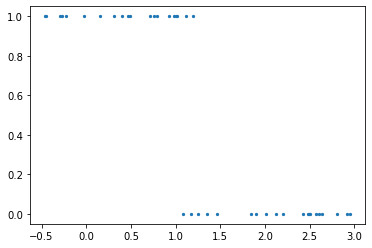

In [5]:
plt.scatter(data.x, data.y, s=5)

In [7]:
def calculate_gradient_log_likelihood(curr_betas, data):
    numerator = np.exp(curr_betas[0] + curr_betas[1]*data.x)
    p = numerator / (1 + numerator)
    
    partial_0 = np.sum(data.y - p)
    partial_1 = np.sum((data.y - p)*data.x)
    
    return np.array([partial_0, partial_1])

In [14]:
curr_betas = np.array([0.0,0.0])
diff = np.inf
eta = 0.1

while diff > .001:
    grad = calculate_gradient_log_likelihood(curr_betas, data)
    diff = abs(grad).sum()
    curr_betas += eta*grad
    
print(curr_betas)

[ 20.3250053  -17.71620914]


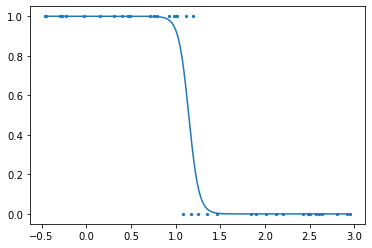

In [15]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), .01)
p_vals = 1 / (1 + np.exp(-(curr_betas[0] + curr_betas[1]*x_vals)))
plt.plot(x_vals, p_vals)

# Built-In Solution

In [16]:
clf = LogisticRegression(penalty='none')
clf.fit(np.array(data.x).reshape(-1,1), data.y)
print('beta_0: %s'%clf.intercept_[0])
print('beta_1: %s'%clf.coef_[0][0])

beta_0: 20.45573473276307
beta_1: -17.83121265209636


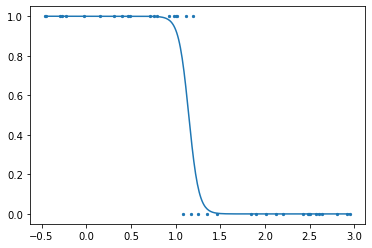

In [17]:
plt.scatter(data.x, data.y, s=5)

x_vals = np.arange(data.x.min(), data.x.max(), .01)
p_vals = 1 / (1 + np.exp(-(clf.intercept_[0] + clf.coef_[0][0]*x_vals)))
plt.plot(x_vals, p_vals)